INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple du calcul d'un axe par analyse en composantes principales (ACP)

In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Lecture ou création d'une image binaire.

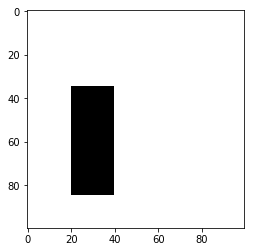

In [2]:
#Image 1
#image = np.invert(data.horse()) 
#Image 2
image = np.zeros((100,100))
image[35:85,20:40] = 1
#Affichage
plt.figure(figsize=(4,4)) 
plt.imshow(image, plt.get_cmap('binary'))
plt.show()

Listes contenant les coordonnées en X et en Y des pixels à True.

In [3]:
LesX = []
LesY = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] == True:
            LesX = LesX + [j]
            LesY = LesY + [i]

Moyennes et covariance des coordonnées pour calculer les vecteurs propres, valeurs propres.

In [4]:
MoyX = np.mean(LesX)
MoyY = np.mean(LesY)
LesX = LesX - MoyX
LesY = LesY - MoyY
matcov = np.cov(LesX,LesY)

Calcul des vecteurs propres/valeurs propres pour trouver les axes principaux. Trouve le système de coordonnées optimal pour représenter les pixels à True.

In [5]:
val, vec = np.linalg.eig(matcov)
maxval = np.argmax(val)

Affichage de l'axe ayant le plus d'énergie.

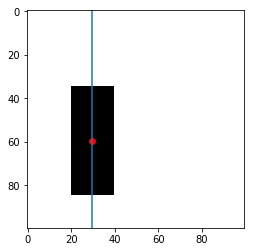

In [6]:
plt.figure(figsize=(4,4)) 
plt.imshow(image, plt.get_cmap('binary'))
plt.plot(MoyX,MoyY, marker='o', color = 'r')
ax = plt.gca()
xmin = MoyX - 100*vec[maxval,0]
xmax = MoyX + 100*vec[maxval,0]
ymin = MoyY - 100*vec[maxval,1]
ymax = MoyY + 100*vec[maxval,1]
l = mlines.Line2D([xmin,xmax], [ymin,ymax])
ax.add_line(l)

plt.show()